# ITM

Curso: Visión artificial

Docente: Mateo Rico Garcia



# Clase 09: Procesamiento en video

Un video podría ser entendido como una secuencia de imágenes.

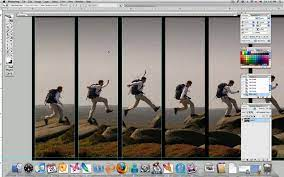

# 1. Lectura, descomposición y visualización de un video

Una de las maneras más clásicas de visualizar un video tiene que ver con su descomposición en frames, y visualización secuencial dentro de una función de iteración.

https://programmerclick.com/article/1430317354/

In [ ]:
#Algoritmo para detección de bordes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#Leyendo y mostrando video de referencia
Ruta = r'/home/felipeqg/Documents/Vision-Artificial/assets/videos/rhinos.avi'#Ubicación de la imagen desde el google drive
Video = cv2.VideoCapture(Ruta) #Abre video o dispositivo de captura en una secuencia de imagenes
Contador = 0

while(Video.isOpened()):
  ret, frame = Video.read () ## ret devuelve un valor booleano
  if ret == True:
    Contador=Contador+1
    Color=frame[:,:,[2,1,0]]#Organiza
    print('')
    print('Fotograma número: ',Contador)
    plt.imshow(Color.astype('uint8'),vmin=0, vmax=255) # cmap='gray' Grafica la imagen 
    plt.show()    
  else:
      break


Video.release()


# 2. Lectura, descomposición, visualización y almacenamiento de un video

In [ ]:
#Etapa 1: Instalando librería para guardar video
!pip install scikit-video

#Etapa 2: Algoritmo para extraer parámetros del video original
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios
import skvideo.io

#Leyendo video de referencia
Ruta = r'/content/drive/MyDrive/1_CLASS/VAR84/09/rhinos.avi'#Ubicación de la imagen desde el google drive
Video = cv2.VideoCapture(Ruta)
#Testeando tamaño de video original
Frames_number=0
while(Video.isOpened()):
  ret, frame = Video.read () ## ret devuelve un valor booleano
  if ret == True:
    Frames_number=Frames_number+1
    Color=frame[:,:,[2,1,0]]#Organiza
    cv2.imwrite('/content/drive/MyDrive/1_CLASS/VAR84/09/rhinos_'+str(Frames_number)+'.jpg',Color)
    [Fl,Cl,Ch]=Color.shape
    
  else:
      break

Stack=np.zeros((Frames_number,Fl,Cl,Ch))#Variable para guardar frames del video 
Video.release()

# Etapa 3: Guardando el video
Ruta = r'/content/drive/MyDrive/1_CLASS/VAR84/09/rhinos.avi'#Ubicación de la imagen desde el google drive
Video = cv2.VideoCapture(Ruta)
i=0
while(Video.isOpened()):
  ret, frame = Video.read () ## ret devuelve un valor booleano
  if ret == True:
    #Aquí agregue el procesamiento de los frames del video
    Stack[i]=frame.astype(np.uint8)
    i=i+1
  else:
    break

skvideo.io.vwrite("/content/drive/MyDrive/1_CLASS/VAR84/09/Salida.avi", Stack)#Ruta y nombre para guardar
Video.release()

#Referencias.
#http://www.scikit-video.org/stable/io.html
#https://soundartifacts.com/es/how-to/186-how-to-install-ffmpeg-on-windows-10-amp-add-ffmpeg-to-windows-path.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3. Procesando imágenes del video:

In [ ]:
#Librería para guardar video
#Etapa 1: Instalando librería para guardar video
!pip install scikit-video
import skvideo.io

#Librería matemática en detección de bordes Prewitt
from math import sqrt

#Librería para el manejo de imágenes
import cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

#Leyendo video de referencia
Ruta = r'/content/drive/MyDrive/1_CLASS/VAR84/09/rhinos.avi'#Ubicación de la imagen desde el google drive
Video = cv2.VideoCapture(Ruta)
#Testeando tamaño de video original
Frames_number=0
while(Video.isOpened()):
  ret, frame = Video.read () ## ret devuelve un valor booleano
  if ret == True:
    Frames_number=Frames_number+1
    Color=frame[:,:,[2,1,0]]#Organiza
    
    [Fl,Cl,Ch]=Color.shape
    
  else:
      break

Stack=np.zeros((Frames_number,Fl,Cl,Ch))#Variable para guardar frames del video 
Video.release()
 
#output info
Ruta = r'/content/drive/MyDrive/1_CLASS/VAR84/09/rhinos.avi'#Ubicación de la imagen desde el google drive
Video = cv2.VideoCapture(Ruta)
t=0
while(Video.isOpened()):
  ret, frame = Video.read () ## ret devuelve un valor booleano
  if ret == True:
    Color=frame[:,:,[2,1,0]]#Organiza
    I_Gris=cv2.cvtColor(Color, cv2.COLOR_BGR2GRAY)
    [Fl, Cl]=I_Gris.shape #Genera dos variables para almacenar el número de filas y Columnas 
    Resultado_X1=np.zeros((Fl,Cl))
    Resultado_Y1=np.zeros((Fl,Cl))
    Resultado_X2=np.zeros((Fl,Cl))
    Resultado_Y2=np.zeros((Fl,Cl))
    Resultado_Total=np.zeros((Fl,Cl,Ch))
    #Crea kernels Sobel manualmente
    kernel_x1 = np.array(([-1,0,1],[-2,0,2],[-1,0,1]),dtype='float')
    kernel_x2 = np.array(([1,0,-1],[2,0,-2],[1,0,-1]),dtype='float')
    kernel_y1 = np.array(([-1,-2,-1],[0,0,0],[1,2,1]),dtype='float')
    kernel_y2 = np.array(([1,2,1],[0,0,0],[-1,-2,-1]),dtype='float')

    #Corriendo filtros
    Resultado_X1 = cv2.filter2D(I_Gris,-1,kernel_x1)
    Resultado_X2 = cv2.filter2D(I_Gris,-1,kernel_x2)
    Resultado_Y1 = cv2.filter2D(I_Gris,-1,kernel_y1)
    Resultado_Y2 = cv2.filter2D(I_Gris,-1,kernel_y2)


    # Calculando resultado total
    for k in range(0, Ch, 1):
      for i in range(0, Fl, 1):
        for j in range(0, Cl, 1):
          Resultado_Total[i,j,k]=sqrt((Resultado_X1[i,j]/8)**2+(Resultado_X2[i,j]/8)**2+(Resultado_Y1[i,j]/8)**2+(Resultado_Y2[i,j]/8)**2)

      # Normalizando resultados
    Resultado_Total=cv2.normalize(Resultado_Total, Resultado_Total, 0, 255, norm_type=cv2.NORM_MINMAX)  
    Stack[t]=Resultado_Total.astype(np.uint8)
    t=t+1
    
    print('')
    plt.imshow(Resultado_Total.astype('uint8'),vmin=0, vmax=255,cmap='gray') # cmap='gray' Grafica la imagen 
    plt.show()
  else:
      break


skvideo.io.vwrite("/content/drive/MyDrive/1_CLASS/ET0158/Notebooks/09/Salida2.avi", Stack)#Ruta y nombre para guardar
Video.release()

Output hidden; open in https://colab.research.google.com to view.

# Actividad
Descargue un video, y aplique alguno de los algortimos de procesado de imágenes vistos en clase.